In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Advanced data visualization
import re # Regular expressions for advanced string selection
from mlxtend.frequent_patterns import apriori # Data pattern exploration
from mlxtend.frequent_patterns import association_rules # Association rules conversion
from mlxtend.preprocessing import OnehotTransactions # Transforming dataframe for apriori
import missingno as msno # Advanced missing values handling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('Oye_happy.xlsx')

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'State'],
      dtype='object')

In [ ]:
df = pd.read_excel('Oye_happy.xlsx')
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.set_index(['InvoiceDate'] , inplace=True)

# Dropping StockCode to reduce data dimension
# Checking df.sample() for quick evaluation of entries
df.drop('StockCode', axis=1, inplace=True)
df.sample(5, random_state=42)

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,State
InvoiceDate,,,,,,
2011-06-01 12:05:00,555200,HANGING JAM JAR T-LIGHT HOLDER,24,0.85,17315.0,Telanga
2011-05-27 17:14:00,554974,GOLD FISHING GNOME,4,6.95,14031.0,Telanga
2011-04-21 17:05:00,550972,SET/6 RED SPOTTY PAPER CUPS,4,0.65,14031.0,Telanga
2011-11-16 10:39:00,576652,PACK 3 BOXES CHRISTMAS PANETTONE,3,1.95,17198.0,Telanga
2011-03-10 08:40:00,546157,RETROSPOT LAMP,2,9.95,13502.0,Telanga


In [ ]:
df.shape

(541909, 6)

In [ ]:
df.columns

Index(['InvoiceNo', 'Description', 'Quantity', 'UnitPrice', 'CustomerID',
       'State'],
      dtype='object')

In [ ]:
df.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,State
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,Telanga
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,3.39,17850.0,Telanga
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,Telanga
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,Telanga
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,Telanga


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   State        541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ MB
None


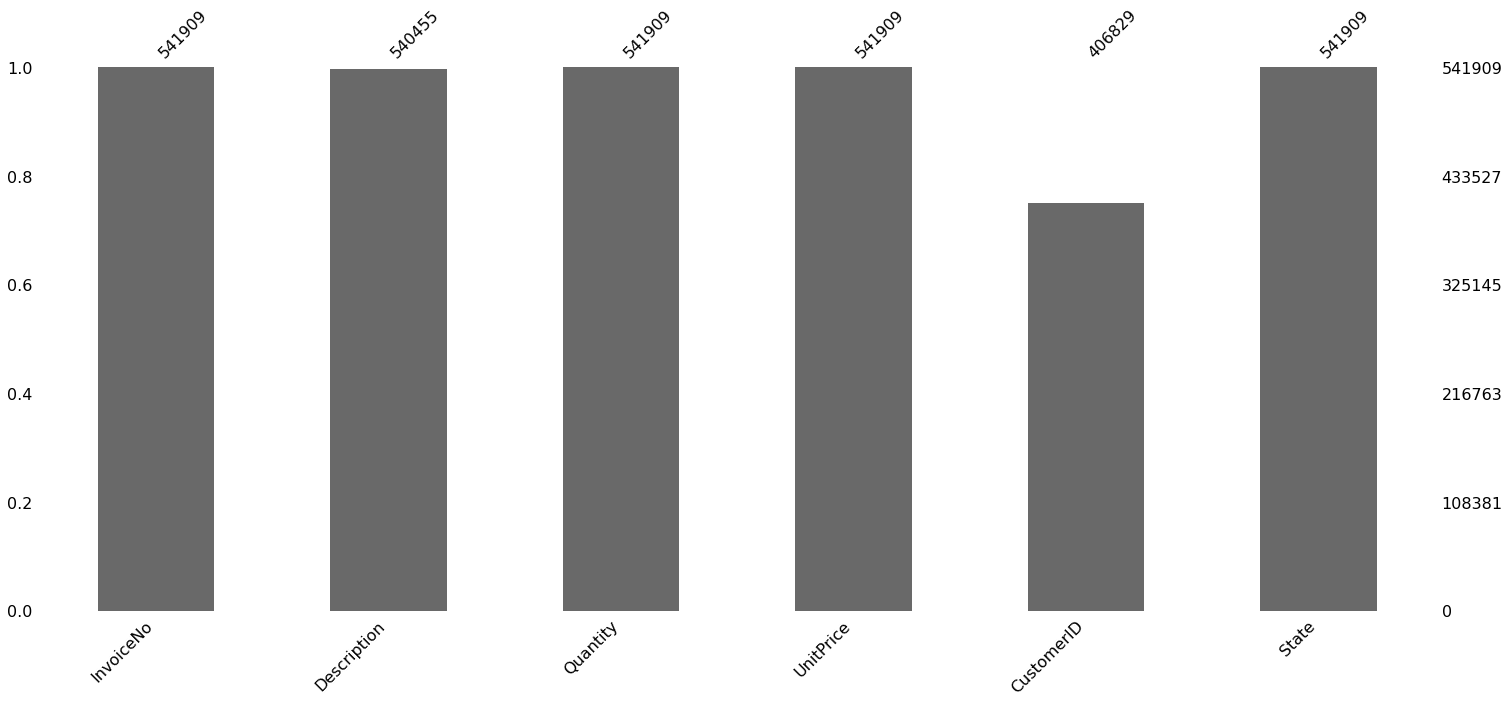

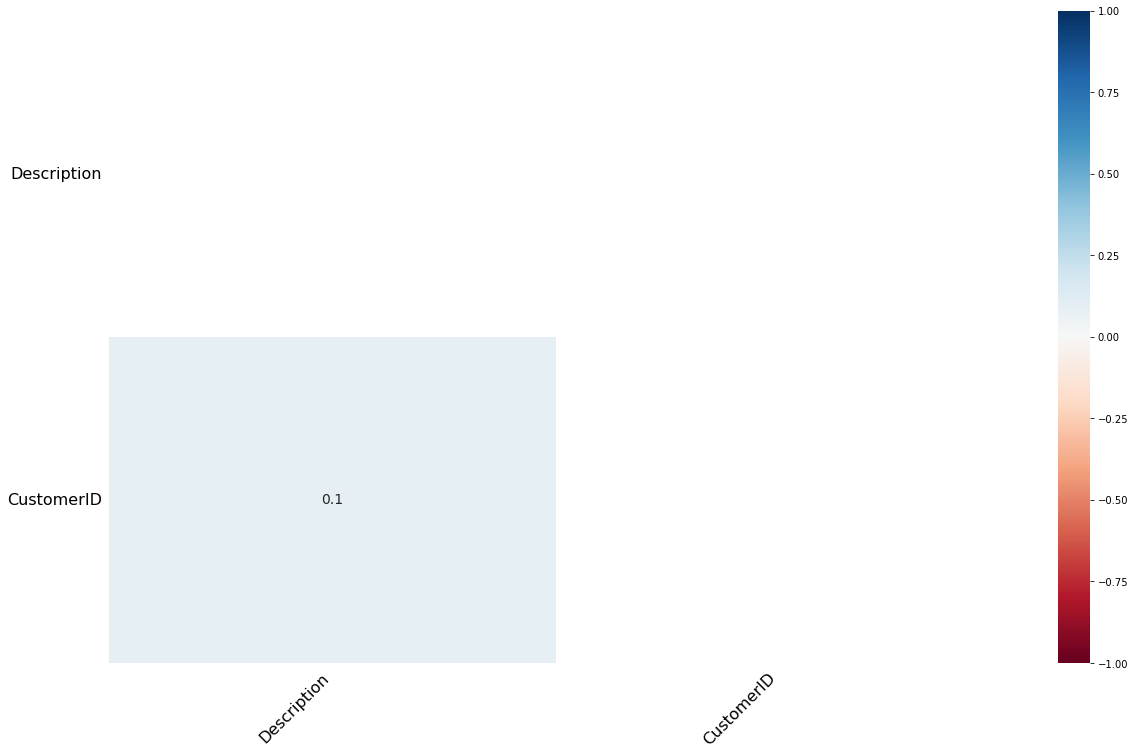

In [ ]:
print(df.info())
msno.bar(df);
msno.heatmap(df);

In [ ]:
find_nans = lambda df: df[df.isnull().any(axis=1)]
find_nans

<function __main__.<lambda>(df)>

In [ ]:
dlm = 0
og_len = len(df.InvoiceNo)

# It does not matter not having CustomerID in this analysis
# however a NaN Description shows us a failed transaction
# We will drop NaN CustomerID when analysing customer behavior 
df.dropna(inplace=True, subset=['Description'])

# data_loss report
new_len = len(df.InvoiceNo)
dlm += (og_len - new_len)
print('Data loss report: %.2f%% of data dropped, total of %d rows' % (((og_len - new_len)/og_len), (og_len - new_len)))
print('Data loss totals: %.2f%% of total data loss, total of %d rows\n' % ((dlm/og_len), (dlm)))
mod_len = len(df.InvoiceNo)
df.info()

Data loss report: 0.00% of data dropped, total of 1454 rows
Data loss totals: 0.00% of total data loss, total of 1454 rows

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 540455 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     540455 non-null  int64  
 3   UnitPrice    540455 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   State        540455 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [ ]:
state_set = df[['State', 'InvoiceNo']]
state_set = state_set.pivot_table(columns='State', aggfunc='count')
state_set.sort_values('InvoiceNo', axis=1, ascending=False).T

,InvoiceNo
State,
Telanga,494024
Gujarath,9495
Tamil Nadu,8557
Karnataka,8196
Chattisgarh,2533
Nepal,2371
Maharastra,2069
Telanaga,2002
Goa,1519


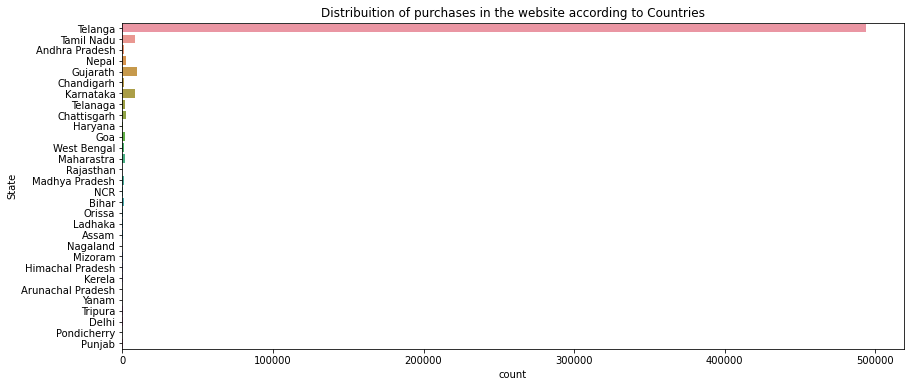

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Distribuition of purchases in the website according to Countries');
sns.countplot(y='State', data=df);

In [ ]:
# Creating subsets of df for each unique State
def df_per_State(df):
    df_dict = {}
    unique_countries, counts = np.unique(df.State, return_counts=True)
    for State in unique_countries:
        df_dict["df_{}".format(re.sub('[\s+]', '', State))] = df[df.State == State].copy()
        df_dict["df_{}".format(re.sub('[\s+]', '', State))].drop('State', axis=1, inplace=True)
    return df_dict


df_dict = df_per_State(df)
locals().update(df_dict)

In [ ]:
def series_plot(df, by1, by2, by3, period='D'):
    df_ts = df.reset_index().pivot_table(index='InvoiceDate', 
                                values=['InvoiceNo', 'Quantity', 'UnitPrice'], 
                                aggfunc=('count', 'sum'))
    df_ts = df_ts.loc[:, [('InvoiceNo', 'count'), ('Quantity', 'sum'), ('UnitPrice', 'sum')]]
    df_ts.columns = df_ts.columns.droplevel(1)
    plt.figure(figsize=(14, 6))
    
    plt.subplot(2, 2, 1)
    plt.plot(df_ts.resample(period).sum().bfill()[[by1]], color='navy')
    plt.title('{}'.format(by1));
    plt.xticks(rotation=60);
    plt.subplot(2, 2, 2)
    plt.title('{}'.format(by2));
    plt.plot(df_ts.resample(period).sum().bfill()[[by2]], label='Total Sale', color='orange');
    plt.xticks(rotation=60)
    plt.tight_layout()
    
    plt.figure(figsize=(14, 8))
    plt.title('{}'.format(by3));
    plt.plot(df_ts.resample(period).sum().bfill()[[by3]], label='Total Invoices', color='green');
    plt.tight_layout()

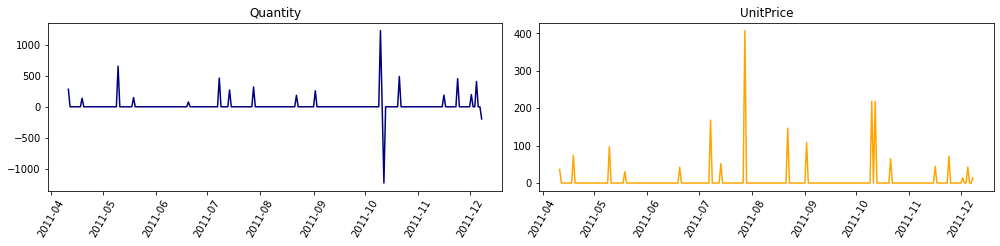

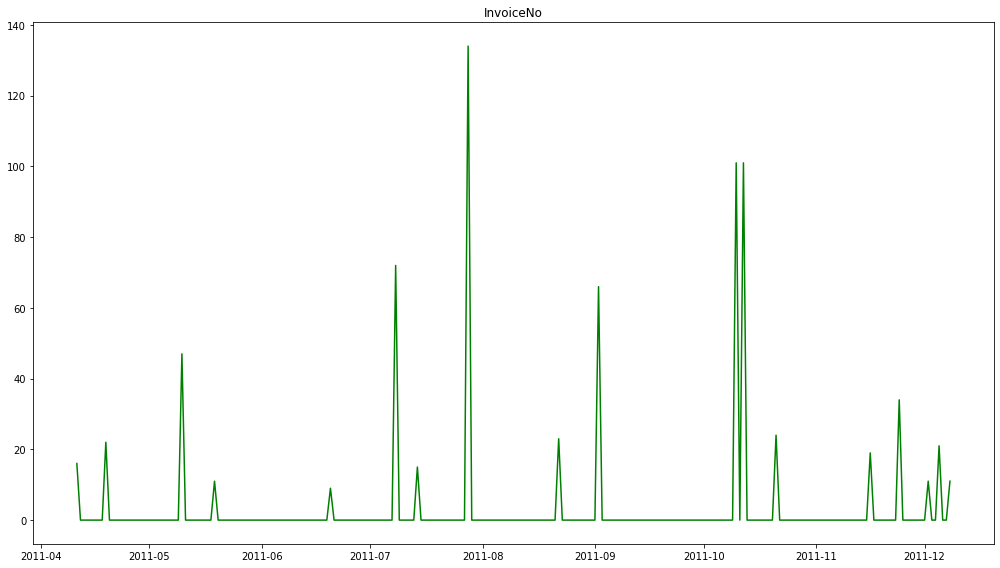

In [ ]:
series_plot(df_Delhi, 'Quantity', 'UnitPrice', 'InvoiceNo')

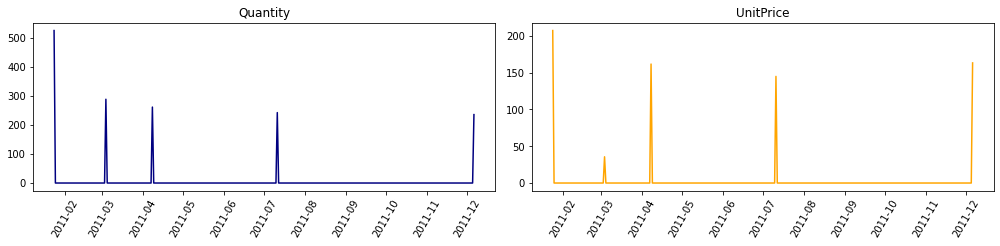

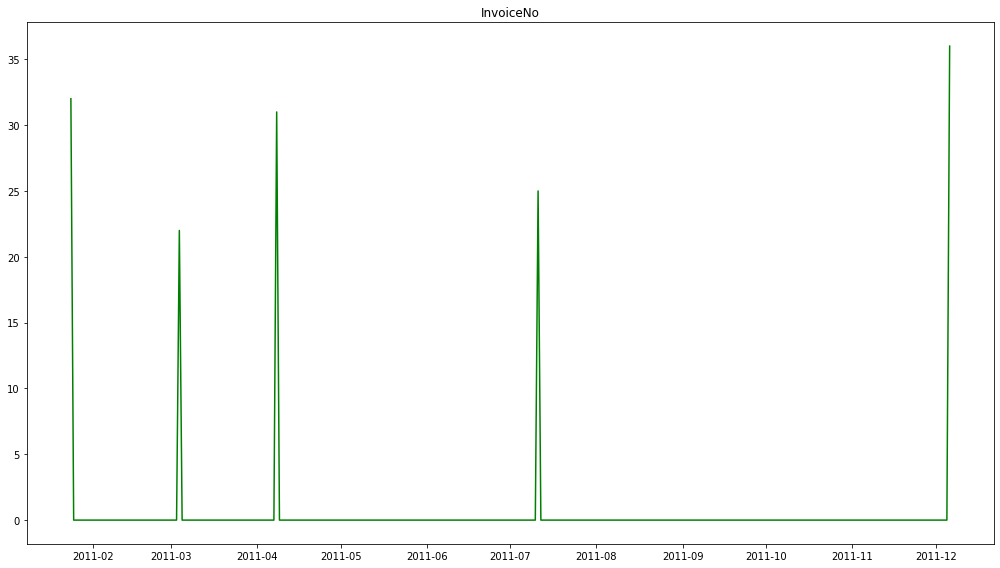

In [ ]:
series_plot(df_Mizoram,'Quantity', 'UnitPrice', 'InvoiceNo')

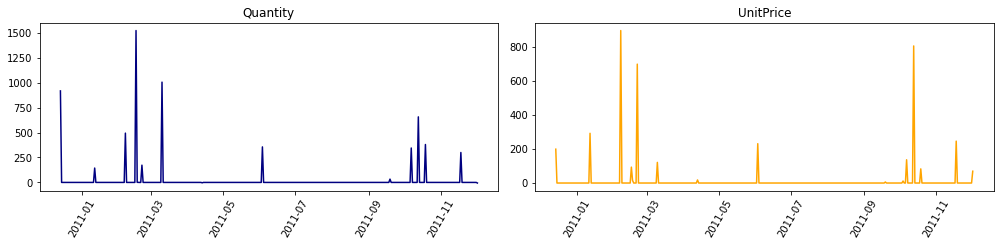

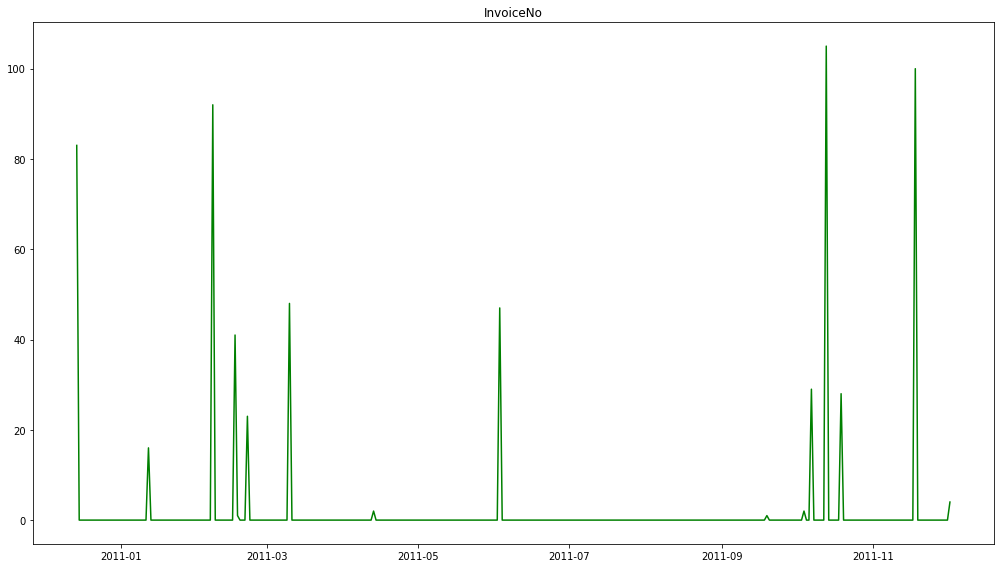

In [ ]:
series_plot(df_Orissa,'Quantity', 'UnitPrice', 'InvoiceNo')

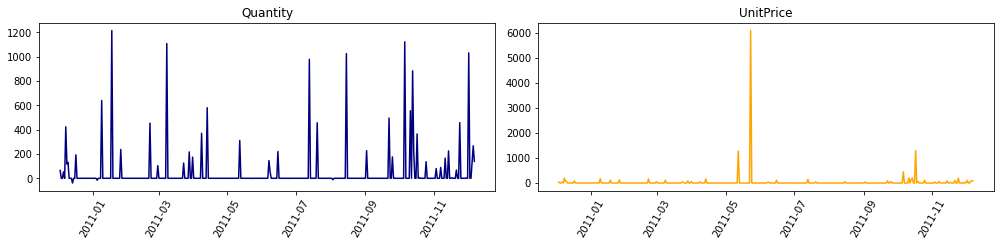

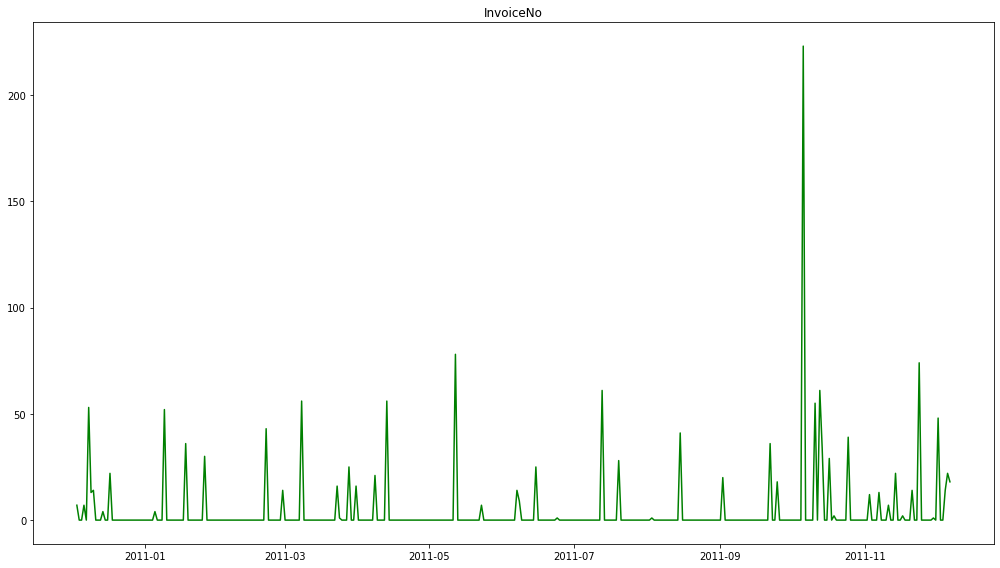

In [ ]:
series_plot(df_Goa,'Quantity', 'UnitPrice', 'InvoiceNo')

In [ ]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
basket = (df[df['State'] =="Telanga"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:

basket

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
...,...,...
126,0.030535,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."
127,0.042053,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
128,0.035196,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
129,0.037392,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046928,0.049821,0.030160,0.642694,12.900183,0.027822,2.659288
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049821,0.046928,0.030160,0.605376,12.900183,0.027822,2.415142
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050035,0.037660,0.030910,0.617773,16.403939,0.029026,2.517719
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051267,0.050035,0.037553,0.732497,14.639752,0.034988,3.551237


In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.03766,0.050035,0.03091,0.820768,16.403939,0.029026,5.300203


In [ ]:
len(basket_sets)

18667

In [ ]:
basket_sets.shape

(18667, 4174)

In [ ]:
from itertools import combinations
# Convert basket_sets to transaction format
transactions = basket_sets.apply(lambda x: x[x==1].index.tolist(), axis=1).tolist()

# Get unique items in the dataset
items = list(set([item for transaction in transactions for item in transaction]))

# Create dictionary to store support counts for each item
support_counts = {item:0 for item in items}

# Compute support counts for each item
for transaction in transactions:
    for item in transaction:
        support_counts[item] += 1

# Apply ECLAT algorithm with minimum support of 0.05 and max items of 3
min_support = 0.05
max_items = 3
frequent_itemsets = {}
for k in range(1, max_items+1):
    itemsets = [(item,) for item in items if support_counts[item] >= len(transactions) * min_support]
    frequent_itemsets[k] = itemsets
    if not itemsets:
        break
    while True:
        new_itemsets = []
        for i, itemset1 in enumerate(itemsets):
            for itemset2 in itemsets[i+1:]:
                if len(set(itemset1) & set(itemset2)) == k-1:
                    new_itemset = tuple(sorted(set(itemset1) | set(itemset2)))
                    if new_itemset not in new_itemsets and support_counts[new_itemset[0]] >= len(transactions) * min_support:
                        contains_subset = False
                        for subset in combinations(new_itemset, k):
                            if subset != new_itemset and subset not in itemsets:
                                contains_subset = True
                                break
                        if not contains_subset:
                            new_itemsets.append(new_itemset)
        if not new_itemsets:
            break
        itemsets = new_itemsets
        frequent_itemsets[k] += itemsets

# Print frequent itemsets
for k, itemsets in frequent_itemsets.items():
    print("Frequent itemsets of size {}:".format(k))
    for itemset in itemsets:
        print(itemset)


Frequent itemsets of size 1:
('SET OF 3 CAKE TINS PANTRY DESIGN',)
('VICTORIAN GLASS HANGING T-LIGHT',)
('JUMBO SHOPPER VINTAGE RED PAISLEY',)
('WOODEN PICTURE FRAME WHITE FINISH',)
('WOODEN FRAME ANTIQUE WHITE',)
('LUNCH BAG  BLACK SKULL.',)
('LUNCH BAG SPACEBOY DESIGN',)
('JAM MAKING SET PRINTED',)
('JUMBO BAG PINK POLKADOT',)
('LUNCH BAG SUKI DESIGN',)
('ROSES REGENCY TEACUP AND SAUCER',)
('PARTY BUNTING',)
('HEART OF WICKER SMALL',)
('LUNCH BAG CARS BLUE',)
("PAPER CHAIN KIT 50'S CHRISTMAS",)
('LUNCH BAG RED RETROSPOT',)
('GREEN REGENCY TEACUP AND SAUCER',)
('REGENCY CAKESTAND 3 TIER',)
('SPOTTY BUNTING',)
('ASSORTED COLOUR BIRD ORNAMENT',)
('PACK OF 72 RETROSPOT CAKE CASES',)
('JUMBO STORAGE BAG SUKI',)
('JUMBO BAG RED RETROSPOT',)
('RECIPE BOX PANTRY YELLOW DESIGN',)
('NATURAL SLATE HEART CHALKBOARD',)
('WHITE HANGING HEART T-LIGHT HOLDER',)
('SET OF 4 PANTRY JELLY MOULDS',)
('JAM MAKING SET WITH JARS',)
('LUNCH BAG PINK POLKADOT',)
('SET OF 3 CAKE TINS PANTRY DESIGN', 'VICTORIAN

In [ ]:
from itertools import combinations
# Convert basket_sets to transaction format
transactions = basket_sets.apply(lambda x: x[x==1].index.tolist(), axis=1).tolist()

# Get unique items in the dataset
items = list(set([item for transaction in transactions for item in transaction]))

# Create dictionary to store support counts for each item
support_counts = {item:0 for item in items}

# Compute support counts for each item
for transaction in transactions:
    for item in transaction:
        support_counts[item] += 1

# Apply ECLAT algorithm with minimum support of 0.05 and max items of 3
min_support = 0.04
max_items = 3
frequent_itemsets = {}
for k in range(1, max_items+1):
    itemsets = [(item,) for item in items if support_counts[item] >= len(transactions) * min_support]
    frequent_itemsets[k] = itemsets
    if not itemsets:
        break
    while True:
        new_itemsets = []
        for i, itemset1 in enumerate(itemsets):
            for itemset2 in itemsets[i+1:]:
                if len(set(itemset1) & set(itemset2)) == k-1:
                    new_itemset = tuple(sorted(set(itemset1) | set(itemset2)))
                    if new_itemset not in new_itemsets and support_counts[new_itemset[0]] >= len(transactions) * min_support:
                        contains_subset = False
                        for subset in combinations(new_itemset, k):
                            if subset != new_itemset and subset not in itemsets:
                                contains_subset = True
                                break
                        if not contains_subset:
                            new_itemsets.append(new_itemset)
        if not new_itemsets:
            break
        itemsets = new_itemsets
        frequent_itemsets[k] += itemsets

# Print frequent itemsets
for k, itemsets in frequent_itemsets.items():
    print("Frequent itemsets of size {}:".format(k))
    for itemset in itemsets:
        print(itemset)


Frequent itemsets of size 1:
('LUNCH BAG SUKI DESIGN',)
('RED RETROSPOT CHARLOTTE BAG',)
('GARDENERS KNEELING PAD KEEP CALM',)
('PAPER CHAIN KIT VINTAGE CHRISTMAS',)
('LUNCH BAG CARS BLUE',)
('LUNCH BAG PINK POLKADOT',)
('LUNCH BAG APPLE DESIGN',)
('PACK OF 72 RETROSPOT CAKE CASES',)
('REGENCY CAKESTAND 3 TIER',)
('POPCORN HOLDER',)
('JUMBO BAG RED RETROSPOT',)
('LUNCH BAG RED RETROSPOT',)
('6 RIBBONS RUSTIC CHARM',)
('SET OF 3 CAKE TINS PANTRY DESIGN',)
('SET/5 RED RETROSPOT LID GLASS BOWLS',)
('VINTAGE SNAP CARDS',)
('60 TEATIME FAIRY CAKE CASES',)
('PACK OF 60 PINK PAISLEY CAKE CASES',)
('NATURAL SLATE HEART CHALKBOARD',)
('JAM MAKING SET PRINTED',)
('HEART OF WICKER SMALL',)
('BAKING SET 9 PIECE RETROSPOT',)
('PLEASE ONE PERSON METAL SIGN',)
('SET OF 6 SPICE TINS PANTRY DESIGN',)
('SPOTTY BUNTING',)
('CHARLOTTE BAG SUKI DESIGN',)
('CHOCOLATE HOT WATER BOTTLE',)
('PARTY BUNTING',)
('LUNCH BAG  BLACK SKULL.',)
('ASSORTED COLOUR BIRD ORNAMENT',)
('JUMBO BAG VINTAGE LEAF',)
('WOODEN PI

In [ ]:
pip install fp_growth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyfpgrowth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend
help(mlxtend.frequent_patterns)

Help on package mlxtend.frequent_patterns in mlxtend:

NAME
    mlxtend.frequent_patterns

DESCRIPTION
    # Sebastian Raschka 2014-2018
    # mlxtend Machine Learning Library Extensions
    # Author: Sebastian Raschka <sebastianraschka.com>
    #
    # License: BSD 3 clause

PACKAGE CONTENTS
    apriori
    association_rules

FUNCTIONS
    apriori(df, min_support=0.5, use_colnames=False, max_len=None, n_jobs=1)
        Get frequent itemsets from a one-hot DataFrame
        Parameters
        -----------
        df : pandas DataFrame or pandas SparseDataFrame
          pandas DataFrame the encoded format.
          The allowed values are either 0/1 or True/False.
          For example,
        
        ```
                 Apple  Bananas  Beer  Chicken  Milk  Rice
            0      1        0     1        1     0     1
            1      1        0     1        0     0     1
            2      1        0     1        0     0     0
            3      1        1     0        0     0    

In [ ]:
pip install fpgrowth_py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
help(fpgrowth)

Help on function fpgrowth in module fpgrowth_py.fpgrowth:

fpgrowth(itemSetList, minSupRatio, minConf)



In [ ]:
import pandas as pd
from fpgrowth_py import fpgrowth
transactions = basket_sets.iloc[:, 1:].apply(lambda x: x[x!=0].index.tolist(), axis=1).tolist()
frequent_itemsets = fpgrowth(transactions, minSupRatio=0.2,minConf=0)
print(frequent_itemsets)


No frequent item set
None
